# Inclass Activity_19

## Dimensionality Reduction Techniques

* Dimensionality reduction is used to reduce dimensions of our inputs from a dataset.

* It won't just pick columns from the dataset like feature selection, **it will reduce the dimensions by creating new columns using datas from the dataset**.

### Why it is used?

* The more features we use in our model, will leads to **overfitting problem**. Dimensionality reduction helps us to reduce overfitting by keeping the more important features in the feature set and reducing the number of features that do not help to decide the output. 
                                                                                                
### Types of dimensionality reduction techniques  

   * **Linear Dimensionality Reduction**
        * Principal component analysis (PCA)
        * SVD 
        * Linear discriminant 
        * Non-Negative Matrix Factorization
                
   * **Non Linear Dimensionality Reduction**
        * Isomap Embedding
        * Locally Linear Embedding
        * Multidimensional Scaling
                                                                                                

In [56]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
diabetes_df = pd.read_csv('../SupervisedML_13/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Preprocessing

   Preprocessing is an initial step when we use Machine Learning. After loading our dataset, we have to prepare(cleaning and organizing) our data to make it suitable for Machine learning models. Some Preprocessing steps are:

   * Cleaning null values,handling missing datas, removing weird symbols..
   * Standardizing our dataset, Scaling the columns
   * Converting categorical value columns into numerical values.

In [4]:
# Checking Nans in the dataset
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* It seems like some features contains 0. There is a possibility for preganancy to be 0. But its not possible for other features(Glucose, BloodPressure, SkinThickness, Insulin, BMI). It might be, already our dataset has replaced Nans with 0s or kind of mistyping error.

In [6]:
# I am writing a function to check 0s in the columns. Keeping Columns which contains 0s in a list. 
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','DiabetesPedigreeFunction','BMI']

def check_zeros(df,features):
    for i in features:
        print('%s : No. of 0s: %d' %(i,len(df.loc[df[i]==0,i])))
        
# calling zero_features function
check_zeros(diabetes_df,zero_features)

Glucose : No. of 0s: 5
BloodPressure : No. of 0s: 35
SkinThickness : No. of 0s: 227
Insulin : No. of 0s: 374
DiabetesPedigreeFunction : No. of 0s: 0
BMI : No. of 0s: 11


In [7]:
# If we take mean for entire column, it will calculate including all 0s. So I am calculating only average of non zero
# values.

def impute_zeros(df, features):
    nonzero_vals = df.loc[df[features] != 0, features]
    avg = np.sum(nonzero_vals) / len(nonzero_vals)
    k = len(df.loc[ df[features] == 0, features])   # num of 0-entries
    df.loc[ df[features] == 0, features] = avg   # avg of non 0 values
    print('%s; Replaced %d entries with value: %.3f' % (features, k, avg))
    
for i in zero_features:
    impute_zeros(diabetes_df, i)

Glucose; Replaced 5 entries with value: 121.687
BloodPressure; Replaced 35 entries with value: 72.405
SkinThickness; Replaced 227 entries with value: 29.153
Insulin; Replaced 374 entries with value: 155.548
DiabetesPedigreeFunction; Replaced 0 entries with value: 0.472
BMI; Replaced 11 entries with value: 32.457


#### Logistic Regression Without using Dimensionality reduction (baseline)

In [46]:
from sklearn.linear_model import LogisticRegression

X = diabetes_df.iloc[:,:-1]
y = diabetes_df.iloc[:,-1]

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=6, stratify=y)

#Standardize
sc= StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

#estimator = model
LR = LogisticRegression(random_state= 6)

LR = LR.fit(X_train_sc, y_train)
print('Accuracy Score',LR.score(X_test_sc, y_test).round(2)*100,'%')
predictions = LR.predict(X_test_sc)
print(classification_report(y_test,predictions))

Accuracy Score 79.0 %
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       150
           1       0.80      0.53      0.64        81

    accuracy                           0.79       231
   macro avg       0.79      0.73      0.74       231
weighted avg       0.79      0.79      0.78       231



## 1. Take one of the supervised learning models you have built recently and apply at least three dimensionality reduction techniques to it (separately). Be sure to create a short summary of each technique you use. Indicate how each changed the model performance. 

### Using PCA(Principal Component Anaysis)

* PCA will give more preference to high variance features and then it will go to low variance. For instance, if n_components = 3, we are asking PCA to extract the most 3 important components. Principal Component 1(PC1) contains the most variance features, PC2 contains second most highest variance features and so on.  

* We need to find the exact n_components value. Using **explained_variance_ parameter we can find the best n_components**. I am looping through to plot how many features are having high variance

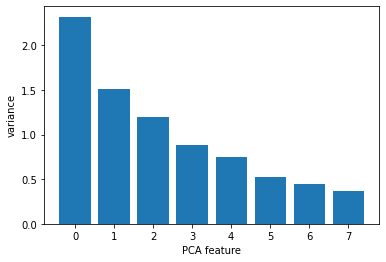

In [84]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

variance = []
for i in range(1,9):
    pca = PCA(n_components = i)
    pca_model = pca.fit(X_train_sc,y_train)
    features = range(pca.n_components_)
    exp_var = pca.explained_variance_
    variance.append(exp_var)
# Plot the explained variances
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

* From bar plot, I am taking features which is having variance of above 0.5 which is 7 here. Now we can apply pca method to diabetes dataset and check our performance

In [88]:
# using pipeline, combining pca and logistic regression together

pca = PCA(n_components = 7)
pipeline_pca = make_pipeline(pca,LR)

# Fit the pipeline to input
pipeline_pca.fit(X_train_sc, y_train)

# Now that I have trained my model, using it on test data to predict output
y_pred_pca = pipeline_pca.predict(X_test_sc)

# printing performance metrics
print("classification_report using PCA")
print(classification_report(y_test,y_pred_pca))

classification_report using PCA
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       150
           1       0.83      0.53      0.65        81

    accuracy                           0.80       231
   macro avg       0.81      0.74      0.75       231
weighted avg       0.80      0.80      0.78       231



* My precision got increased from 0.8 to 0.83, no changes in recall. 

### Using LDA (Linear Discriminant Analysis)

* LDA handles multiple class problem very efficiently. It provides an informative low-dimensional view on the data, which is both useful for visualization and feature engineering.

* But if the classes are non-linearly separable, It can not find a lower-dimensional space to project. 

* The number of dimensions is limited to 1 and C-1, where C is the number of classes. Our dataset is a binary classification problem, limiting the number of dimensions to 1. The “n_components” argument can be set to configure the number of desired dimensions in the output of the transform. So for this case n_components = 1

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 1)

pipeline_lda = make_pipeline(lda,LR)

# Fit the pipeline to 'samples'
pipeline_lda.fit(X_train_sc, y_train)

y_pred_lda = pipeline_lda.predict(X_test_sc)

print("classification_report using LDA")
print(classification_report(y_test,y_pred_lda))

classification_report using LDA
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       150
           1       0.80      0.53      0.64        81

    accuracy                           0.79       231
   macro avg       0.79      0.73      0.74       231
weighted avg       0.79      0.79      0.78       231



* After LDA, we got the same results when we used baseline. No changes from the performance metrics.

### Using Isomap Embedding

* Isomap Embedding is a non linear dimnensionality reduction. It preserves non linear relationships in the dataset.

* Isomap techniques uses Knearest neighbors to compute shortest path and construct the neighborhood graph. It uses multi dimensional scaling to compute lower dimensional embedding.

* The “n_components” argument can be set to configure the number of desired dimensions in the output of the transform. Here  I am choosing n_components = 1

In [74]:
from sklearn.manifold import Isomap

iso = Isomap(n_components = 1)
pipeline_iso = make_pipeline(iso,LR)

# Fit the pipeline to 'samples'
pipeline_iso.fit(X_train_sc, y_train)

y_pred_iso = pipeline_iso.predict(X_test_sc)
print(classification_report(y_test,y_pred_iso))


              precision    recall  f1-score   support

           0       0.76      0.89      0.82       150
           1       0.70      0.47      0.56        81

    accuracy                           0.74       231
   macro avg       0.73      0.68      0.69       231
weighted avg       0.74      0.74      0.73       231



* Both of my precision and recall reduced using Isomap when we compared it to baseline

### Comparison

|       Method             |       Precision      |     Recall         |
|:------------------------:|:--------------------:|:------------------:|
|    Baseline              |         0.80         |     0.53           |                    
|    PCA (Linear)          |         0.83         |     0.53           |              
|    LDA (Linear)          |         0.80         |     0.53           |
| Isomap(Non Linear)       |         0.70         |     0.47           |   

* Out of these 3 methods, PCA delivered improved precision and same recall than baseline.  It may be challenging to choose the right dimensionality reduction technique for our data. However, if we are looking for a non-linear approach, then Locally Linear Embedding (LLE) and Isometric Mapping (Isomap) would be good ones to explore. If we are looking for linear dimensionality, then PCA, SVD, Linear discriminant are good.

## 2. Write a function that will indicate if an inputted IPv4 address is accurate or not. IP addresses are valid if they have 4 values between 0 and 255 (inclusive), punctuated by periods.

Input 1:
2.33.245.5
Output 1:
True

Input 2:
12.345.67.89
Output 2:
False

In [96]:
import re
def address(ip):
    print("Input: ",ip)
    if re.match(r'^((\d{1,2}|1\d{2}|2[0-4]\d|25[0-5])\.){3}(\d{1,2}|1\d{2}|2[0-4]\d|25[0-5])$', ip):  
        print ("Output: True")
    else:
        print ("Output: False")

#### Combinations we might have: 

* I am using regex patterns to match our given IP address meets the required specification or not.

\d - any number from 0 to 9 

\d{1,2} - after \d, we might have 1 or 2 

| - or operator

1\d{2} - first integer is 1, 2nd digit is any integer from 0 to 9 and third integer is 2

2[0-4]\d - after 2 we might have a any digit from 0 to 4 and then any digit from 0 to 9(total 3 digits)

25[0-5] - we know that values between 0 and 255(inclusive). So first 2 digits are 2 and 5, and last digit any digit from 0 to 5.

In [97]:
address("2.33.245.5")

Input:  2.33.245.5
Output: True


In [98]:
address("12.345.67.89")

Input:  12.345.67.89
Output: False
